In [6]:
from models.model2_linear import Dynamic_Bicycle_Linear
from models.model4_joel import FourWheelModel_load_transfer
from models.model2 import BicycleModel
from models.model4 import FourWheelModel
from models.utils import fit_circle
import matplotlib.pyplot as plt

In [7]:
def get_circle_radius(model):
    
    t0 = 0
    N = model.open_loop_tf/model.dt
    
    steering = 0.2
    torque = 70
    
    inputs = [steering, torque, torque, torque, torque]


    t,x_vect = model.do_open_loop_sim_cst_inputs(t0, inputs)
    x = x_vect[int(N/1.1):,0]
    y = x_vect[int(N/1.1):,1]
    radius = fit_circle(x, y)
    ''' x = x_vect[int(N/1.1):,0]
    y = x_vect[int(N/1.1):,1]

    
    plt.plot(x,y)
    plt.axis('equal')'''

    return radius,t,x,y

dt = 0.05
open_loop_tf = 50

T_peak = 0.37
T_slope = 0.4



model2 = BicycleModel(dt,open_loop_tf, T_peak, T_slope)
radius2,t,x_bicycle,y_bicycle = get_circle_radius(model2)
print('Bycicle radius:', radius2)


model4 = FourWheelModel_load_transfer(dt,open_loop_tf, T_peak, T_slope)
radius4,t,x_fourhwheel,y_fourwheel = get_circle_radius(model4)
print('Four wheel radius:', radius4)

'''velocity = 5
model2_lin = Dynamic_Bicycle_Linear(velocity, dt, open_loop_tf, T_peak, T_slope)
radius2_lin,t,x,y = get_circle_radius(model2_lin)
print('Bycicle Linear:', radius2_lin)'''

radius_kinematic = model4.kinematik_model_radius(0.2)
print('Theoretical radius for kinematic model', radius_kinematic)




Bycicle radius: 7.614113488283375
Four wheel radius: 7.59036948110139
Theoretical radius for kinematic model 7.585623609657709


In [10]:
def get_circle_radius(model):
    



    t,x_vect = model.do_open_loop_sim_cst_inputs(t0, inputs)
    x = x_vect[int(N/2):,0]
    y = x_vect[int(N/2):,1]
    
    radius = fit_circle(x, y)
    plt.plot(x,y)
    plt.axis('equal')
    ''' x = x_vect[int(N/1.1):,0]
    y = x_vect[int(N/1.1):,1]

    
    plt.plot(x,y)
    plt.axis('equal')'''

    return radius,t,x,y



steering = 0.2
torque = 60
inputs = [steering, torque, torque, torque, torque]

t0 = 0
dt = 0.05
open_loop_tf = 500
N = open_loop_tf/dt
T_peak = 0.37 # 0.39 = 52.8213818215
T_slope = 0.4






model2 = BicycleModel(dt,open_loop_tf, T_peak, T_slope)
model4 = FourWheelModel_load_transfer(dt,open_loop_tf, T_peak, T_slope)


t,x_vect_2 = model2.do_open_loop_sim_cst_inputs(t0, inputs)
x2 = x_vect_2[int(N/2):,0]
y2 = x_vect_2[int(N/2):,1]
#plt.plot(x2,y)
#lt.axis('equal')

t,x_vect = model4.do_open_loop_sim_cst_inputs(t0, inputs)
x4 = x_vect[int(N/2):,0]
y4 = x_vect[int(N/2):,1]



radius2 = fit_circle(x2[int(N/2):], y2[int(N/2):])
radius4 = fit_circle(x4[int(N/2):], y4[int(N/2):])


radius_kinematic = model4.kinematik_model_radius(0.2)
print('Simulated radius for two wheel model', radius2)
print('Simulated radius for fourwheel wheel model', radius4)
print('Theoretical radius for kinematic model', radius_kinematic)



Simulated radius for two wheel model 2.7921568254921225
Simulated radius for fourwheel wheel model 7.4892847076563065
Theoretical radius for kinematic model 7.585623609657709


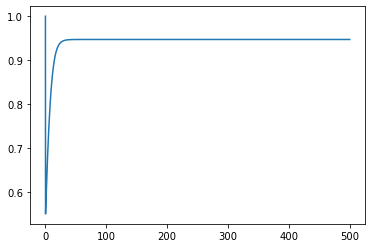

In [11]:
plt.plot(t, x_vect_2[0:,5])

Text(0, 0.5, '$y \\rm [m]$')

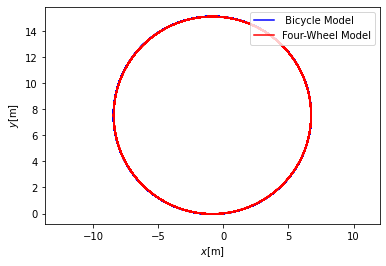

In [14]:
plt.plot(x2,y2, label = r' Bicycle Model', color='b')
plt.plot(x4,y4, label = r'Four-Wheel Model', color='r')
plt.legend(loc='upper right')
plt.axis('equal')
plt.xlabel(r'$x \rm [m]$')
plt.ylabel(r'$y \rm [m]$')